# Esame di SQ
 
Referenze:

- https://www.youtube.com/watch?v=-o3AxdVcUtQ (setup)

- https://www.youtube.com/watch?v=zxOYp7hUtwk (esempi di analisi)

- https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

To Do

- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

1. Selection of the dataset from the e-learning pages: ant-1.7.csv

2. Selection of the dependent variable: software faultiness, i.e., the presence of at least
one fault in a module

3. Selection of the independent variables: select four variables in the dataset

4. Visualization of the dataset via diagrams for single variables (e.g., histograms, pie
charts) and diagrams for pairs of variables (e.g., scatterplots)

5. Computation of descriptive statistics for the dependent and the independent variables

6. Selection of one or more data analysis techniques

7. Building of a set of univariate and multivariate statistically significant models.    
    
    a. Make sure that their assumptions are satisfied, otherwise carry out outlier
    analysis and removal
    
    b. Whenever possible, use both parametric (e.g., Pearson's correlation coefficient)
and nonparametric (e.g., Spearman's rho, Kendall's tau) techniques


8. Description of the results obtained and the limitation to their use (e.g., threats to
validity)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import pathlib
import os
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from numpy import cov

# Utility
def count_values(array_input):
    labels = []
    values = []    
    try:
        for i in range(0, len(array_input)):
            value: int = int(array_input[i])
            # l'elemento è presente, aumento il suo contatore
            if value in labels:
                index = labels.index(value)
                values[index] = values[index] + 1
            # l'elemento non è
            # lo aggiungo alla lista delle label e segno che ce nè uno
            else:
                values.append(1)
                labels.append(value)
        check_sum = sum(values)
    except Exception as ex:
        print(ex)
    return labels, values





In [2]:
directory = pathlib.Path().absolute()
path = os.path.join(directory, 'dataset.csv')
data = pd.read_csv(path)

# Understand the data

In [3]:
data.head()

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,ant,1.7,org.apache.tools.ant.taskdefs.rmic.RmicAdapter...,3,1,0,10,18,3,1,...,0.0,0,0.0,0.444444,0,0,32.666667,1,0.6667,0
1,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,5,2,0,4,13,0,1,...,1.0,1,0.7,0.500000,0,0,13.400000,1,0.6000,0
2,ant,1.7,org.apache.tools.ant.taskdefs.optional.junit.O...,1,2,0,1,3,0,0,...,0.0,0,1.0,1.000000,0,0,6.000000,0,0.0000,0
3,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,8,1,9,13,20,12,9,...,0.2,1,0.0,0.406250,0,0,11.000000,1,0.8750,0
4,ant,1.7,org.apache.tools.ant.taskdefs.WaitFor,9,3,0,5,26,16,0,...,1.0,0,0.8,0.388889,0,0,19.000000,2,1.0000,1


In [4]:
data.describe()

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1.700000e+00,11.071141,2.522148,0.731544,11.046980,34.362416,89.147651,5.655034,5.746309,8.365101,...,0.644855,0.726174,0.509968,0.474685,0.720805,1.312752,23.640870,4.669799,1.366053,0.453691
std,2.377473e-14,11.975963,1.398869,4.800357,26.343149,36.024972,349.937555,25.814223,5.653176,9.331319,...,0.438138,1.426581,0.398696,0.259931,0.938948,2.332602,76.986079,6.276853,0.881739,1.138673
min,1.700000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000e+00,4.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.269841,0.000000,0.000000,9.066667,1.000000,0.857100,0.000000
50%,1.700000e+00,7.000000,2.000000,0.000000,6.000000,23.000000,6.000000,1.000000,4.000000,6.000000,...,1.000000,0.000000,0.681818,0.437500,0.000000,0.000000,16.400000,3.000000,1.142900,0.000000
75%,1.700000e+00,14.000000,4.000000,0.000000,11.000000,43.000000,53.000000,4.000000,8.000000,10.000000,...,1.000000,1.000000,0.869919,0.666667,1.000000,2.000000,28.000000,6.000000,1.666700,0.000000
max,1.700000e+00,120.000000,7.000000,102.000000,499.000000,288.000000,6692.000000,498.000000,37.000000,103.000000,...,1.000000,11.000000,1.000000,1.000000,5.000000,19.000000,2052.000000,53.000000,6.777800,10.000000


_1.1 data size_

In [5]:
data.shape

(745, 24)

_1.2 colums name_

In [6]:
data.columns

Index(['name', 'version', 'name.1', 'wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom',
       'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic',
       'cbm', 'amc', 'max_cc', 'avg_cc', 'bug'],
      dtype='object')

_1.3 count unique value_

In [7]:
data.nunique()

name         1
version      1
name.1     745
wmc         58
dit          7
noc         18
cbo         57
rfc        133
lcom       195
ca          47
ce          33
npm         46
lcom3      289
loc        414
dam         66
moa         11
mfa        241
cam        273
ic           6
cbm         18
amc        520
max_cc      35
avg_cc     234
bug         10
dtype: int64

In [8]:
data['bug'].unique()

array([ 0,  1,  3,  2,  6,  4,  8,  5, 10,  7], dtype=int64)

_1.4 Check integrity_

In [9]:
data.isnull().sum()

name       0
version    0
name.1     0
wmc        0
dit        0
noc        0
cbo        0
rfc        0
lcom       0
ca         0
ce         0
npm        0
lcom3      0
loc        0
dam        0
moa        0
mfa        0
cam        0
ic         0
cbm        0
amc        0
max_cc     0
avg_cc     0
bug        0
dtype: int64

<AxesSubplot:>

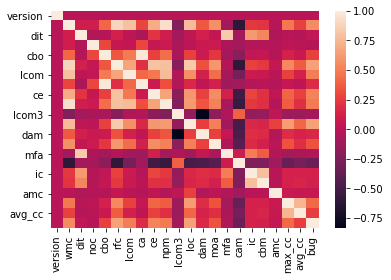

In [10]:
correlation_all_matrix = data.corr()
sn.heatmap(correlation_all_matrix)

In [11]:
print(np.around(correlation_all_matrix,3))

         version    wmc    dit    noc    cbo    rfc   lcom     ca     ce  \
version      1.0  0.000 -0.000  0.000  0.000  0.000 -0.000  0.000  0.000   
wmc          0.0  1.000  0.104  0.107  0.411  0.888  0.793  0.287  0.702   
dit         -0.0  0.104  1.000 -0.032 -0.017  0.123  0.021 -0.067  0.213   
noc          0.0  0.107 -0.032  1.000  0.291  0.054  0.041  0.291  0.053   
cbo          0.0  0.411 -0.017  0.291  1.000  0.351  0.486  0.980  0.271   
rfc          0.0  0.888  0.123  0.054  0.351  1.000  0.664  0.203  0.806   
lcom        -0.0  0.793  0.021  0.041  0.486  0.664  1.000  0.418  0.478   
ca           0.0  0.287 -0.067  0.291  0.980  0.203  0.418  1.000  0.078   
ce           0.0  0.702  0.213  0.053  0.271  0.806  0.478  0.078  1.000   
npm          0.0  0.936  0.110  0.080  0.435  0.787  0.776  0.322  0.656   
lcom3       -0.0 -0.229 -0.097 -0.060 -0.068 -0.211 -0.046 -0.031 -0.189   
loc         -0.0  0.777  0.026  0.017  0.267  0.839  0.573  0.157  0.607   
dam         

# 3 - Selection of the independent variables: select four variables in the dataset


Metrics used 
https://core.ac.uk/download/pdf/185520882.pdf

Takes 4 features
- best for bug = ['rfc','loc','wmc','ce','bug']

In [12]:
features_list = ['rfc','loc','wmc','ce','bug']
drop_list = []

for current_features in data.columns:
    if not current_features in features_list:
        drop_list.append(current_features)
        
data = data.drop(drop_list, axis=1)        
data.shape

(745, 5)

In [13]:
data.head()

,wmc,rfc,ce,loc,bug
0,3,18,9,106,0
1,5,13,4,76,0
2,1,3,1,7,0
3,8,20,4,101,0
4,9,26,5,185,1


# **_3 - Relationship analysis_**

_3.1 Correlation matrix_

<AxesSubplot:>

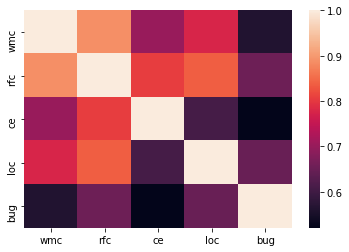

In [14]:
correlation = data.corr()
sn.heatmap(correlation)

# 4 - Visualization of the dataset via diagrams for single variables (e.g., histograms, pie charts) and diagrams for pairs of variables (e.g., scatterplots)

## 4.1 RFC

Response For a Class (RFC)
cardinality of the set of methods that can potentially be executed in response to a message received by an object of the class

Type: ordinal

In [15]:
data['rfc'].describe()

count    745.000000
mean      34.362416
std       36.024972
min        0.000000
25%       11.000000
50%       23.000000
75%       43.000000
max      288.000000
Name: rfc, dtype: float64

<AxesSubplot:xlabel='rfc', ylabel='Count'>

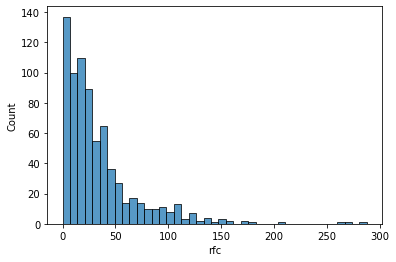

In [16]:
sn.histplot(data['rfc'])

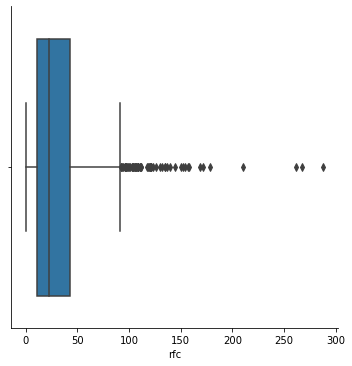

In [17]:
sn.catplot(x='rfc', kind='box', data=data)

##### box plot legend 
- https://medium.com/mlpoint/box-plot-box-and-whiskers-plot-what-does-it-tell-you-99e827fac158

from right to left
- Whiskers (minimum value= Q1 -1.5*IQR)
- 25th percentile
- Medium
- 75th percentile 
- Whiskers (maximum value = Q3 + 1.5*IQR)
- Outliers

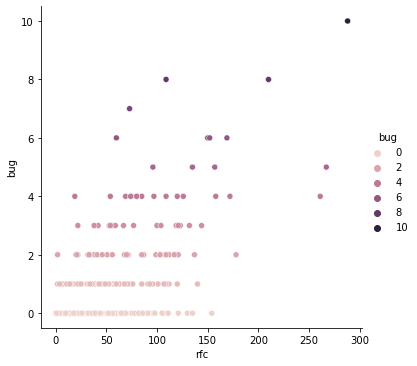

In [18]:
sn.relplot(x='rfc', y='bug', hue='bug',data=data)

In [19]:
np.around(np.corrcoef(data['bug'], data['rfc'])[0,1],3)

0.654

In [20]:
covariance = cov(data['bug'], data['rfc'])
print(covariance)

[[1.29657574e+00 2.68071282e+01]
 [2.68071282e+01 1.29779859e+03]]


Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution. The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

In [21]:
print(np.around(pearsonr(data['bug'], data['rfc']),4))

[0.6535 0.    ]


Bar
- https://www.python-course.eu/naive_bayes_classifier_introduction.php

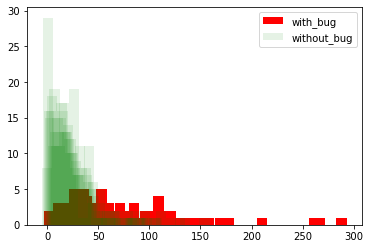

In [22]:
with_bug = []
without_bug = []
col_feature = np.array(data['rfc'])
col_bug = np.array(data['bug'])

for i in range(len(col_bug)):    
    if col_bug[i] > 0:        
        with_bug.append(col_feature[i])
    else:        
        without_bug.append(col_feature[i])

X, Y = count_values(with_bug)
X2, Y2 = count_values(without_bug)

bar_width = 10
plt.bar(X, Y, bar_width,  color="red", alpha=1, label="with_bug")
bar_width = 10
plt.bar(X2, Y2, bar_width,  color="green", alpha=0.10, label="without_bug")
plt.legend(loc='upper right')
plt.show()

### KMeans:
- https://datatofish.com/k-means-clustering-python/

centroids
[[  4   0]
 [ 14   0]
 [ 25   0]
 [ 39   0]
 [ 55   0]
 [ 75   1]
 [101   1]
 [127   2]
 [166   4]
 [272   6]]


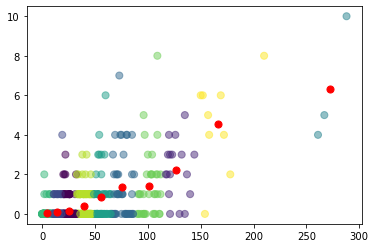

In [23]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

new_data_frame = {'x': data['rfc'],'y': data['bug']}
  
df = DataFrame(new_data_frame,columns=['x','y'])
  
kmeans = KMeans(n_clusters=10).fit(df)
centroids = kmeans.cluster_centers_
print("centroids")
array_int = np.array(centroids, dtype='int')
print(np.sort(array_int,axis=0))

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### Implementing Linear Regression
- https://realpython.com/linear-regression-in-python/

0.42706639041149486
coefficient of determination: 0.42706639041149486
intercept: -0.25609351189236623
slope: 0.02065584634218019


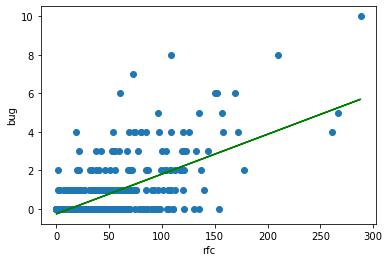

In [66]:
from sklearn.linear_model import LinearRegression
x = np.array(data['rfc']).reshape((-1, 1))
y = np.array(data['bug'])
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)

print(r_sq)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_[0])

plt.scatter(x, y)
plt.xlabel("rfc")
plt.ylabel("bug")
plt.plot(data['rfc'], model.predict(x), color = 'g')

plt.show()


#### mean squared error
- https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

In [69]:
mse = np.sum((model.predict(x) - y)**2)
# root mean squared error
# m is the number of training examples
rmse = np.sqrt(mse/len(x))
print(rmse)

0.8613098751801775


### Outlier detection - percentile
- https://www.youtube.com/watch?v=7sJaRHF03K8

In [71]:
max_thresold = data["rfc"].quantile(0.95)
max_thresold

107.79999999999995

In [72]:
min_thresold = data["rfc"].quantile(0.05)
min_thresold

2.0

In [73]:
outlier_max = data["rfc"]> max_thresold
outlier_min = data["rfc"]< min_thresold
new_data_frame = pd.DataFrame({'rfc': data["rfc"], 'bug': data["bug"], "outlier_max": outlier_max, "outlier_min": outlier_min})
new_data_frame = new_data_frame[new_data_frame['outlier_max'] == 0]
new_data_frame = new_data_frame[new_data_frame['outlier_min'] == 0]
print(new_data_frame)

     rfc  bug  outlier_max  outlier_min
0     18    0        False        False
1     13    0        False        False
2      3    0        False        False
3     20    0        False        False
4     26    1        False        False
..   ...  ...          ...          ...
739   11    0        False        False
741   10    0        False        False
742   26    0        False        False
743   34    1        False        False
744   18    0        False        False

[670 rows x 4 columns]


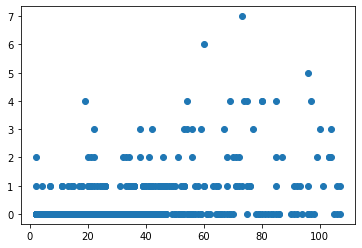

In [74]:
plt.scatter(new_data_frame["rfc"], new_data_frame["bug"])

coefficient of determination: 0.18707516360944043
intercept: -0.12075503623280681
slope: 0.014965974051326995


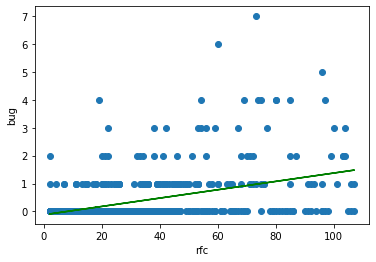

In [75]:
from sklearn.linear_model import LinearRegression
x = np.array(new_data_frame['rfc']).reshape((-1, 1))
y = np.array(new_data_frame['bug'])
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_[0])

plt.scatter(x, y)
plt.xlabel("rfc")
plt.ylabel("bug")
plt.plot(new_data_frame['rfc'], model.predict(x), color = 'g')

plt.show()

#### mean squared error

In [76]:
mse = np.sum((model.predict(x) - y)**2)
rmse = np.sqrt(mse/len(x))
print(rmse)

0.7452590892391235


### Cook’s Distance 
- https://www.statology.org/cooks-distance-python/

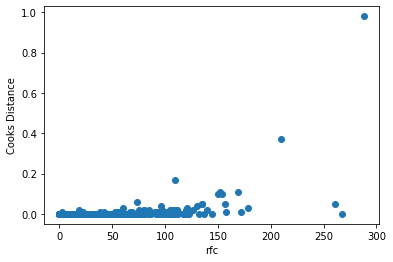

In [108]:
import statsmodels.api as sm

#define response variable
y = data["bug"]
#define explanatory variable
x = data["rfc"]
#add constant to predictor variables
x = sm.add_constant(x)
#fit linear regression model
model = sm.OLS(y, x).fit() 
np.set_printoptions(suppress=True)
#create instance of influence
influence = model.get_influence()
#obtain Cook's distance for each observation
cooks = influence.cooks_distance
#display Cook's distances
roud_value = np.array(cooks[0])
roud_value = np.round(roud_value,2)
plt.scatter(data["rfc"], roud_value)
plt.xlabel('rfc')
plt.ylabel('Cooks Distance')
plt.show()


### Mahalanobis Distance
- https://www.statology.org/mahalanobis-distance-python/

## 4.2 LOC

Source lines of code (LOC) is a software metric used to measure the size of a computer program by counting the number of lines in the text of the program's source code.Source lines of code (LOC) is a software metric used to measure the size of a computer program by counting the number of lines in the text of the program's source code.
Type: ordinal

In [31]:
data['loc'].describe()

count     745.000000
mean      280.071141
std       411.872075
min         0.000000
25%        52.000000
50%       143.000000
75%       323.000000
max      4541.000000
Name: loc, dtype: float64

<AxesSubplot:xlabel='loc', ylabel='Count'>

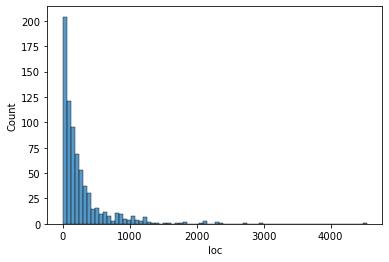

In [32]:
sn.histplot(data['loc'])

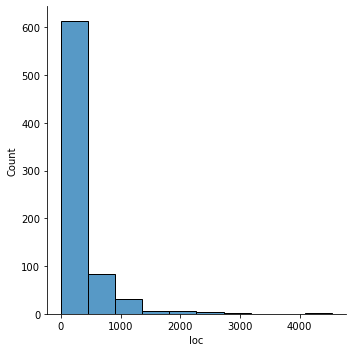

In [33]:
sn.displot(data['loc'], bins=10)

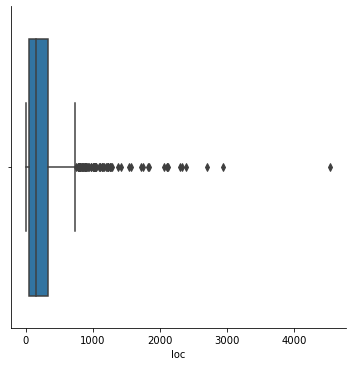

In [34]:
sn.catplot(x='loc', kind='box', data=data)

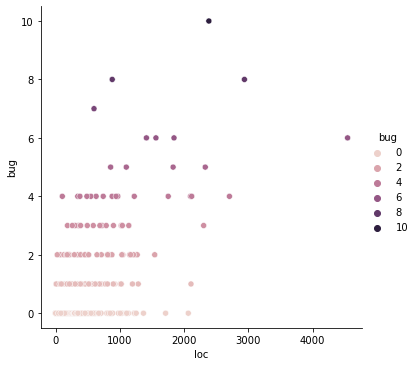

In [35]:
sn.relplot(x='loc', y='bug', hue='bug',data=data)

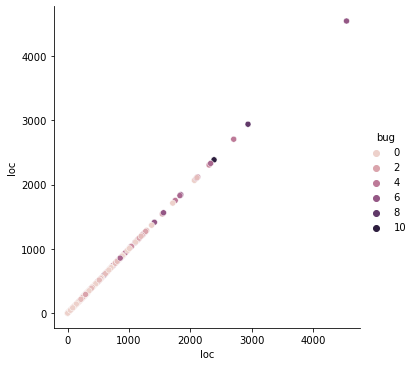

In [36]:
sn.relplot(x='loc', y='loc', hue='bug',data=data)

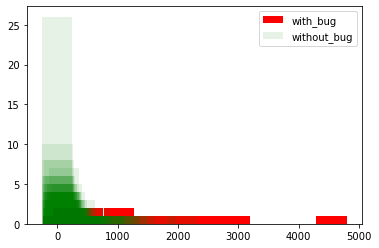

In [37]:
with_bug = []
without_bug = []
col_feature = np.array(data['loc'])
col_bug = np.array(data['bug'])

for i in range(len(col_bug)):    
    if col_bug[i] > 0:        
        with_bug.append(col_feature[i])
    else:        
        without_bug.append(col_feature[i])

X, Y = count_values(with_bug)
X2, Y2 = count_values(without_bug)

bar_width = 500
plt.bar(X, Y, bar_width,  color="red", alpha=1, label="with_bug")
bar_width = 500
plt.bar(X2, Y2, bar_width,  color="green", alpha=0.10, label="without_bug")
plt.legend(loc='upper right')
plt.show()

In [38]:
np.around(np.corrcoef(data['bug'], data['loc'])[0,1],3)

0.649

In [39]:
covariance = cov(data['bug'], data['loc'])
print(covariance)

[[     1.29657574    304.14778812]
 [   304.14778812 169638.6064913 ]]


In [40]:
print(np.around(pearsonr(data['bug'], data['loc']),4))

[0.6485 0.    ]


## 4.3 WMC

Weighted Methods per Class (WMC)
sum of the complexities of the methods of the class
Type: ordinal

In [41]:
data['wmc'].describe()

count    745.000000
mean      11.071141
std       11.975963
min        0.000000
25%        4.000000
50%        7.000000
75%       14.000000
max      120.000000
Name: wmc, dtype: float64

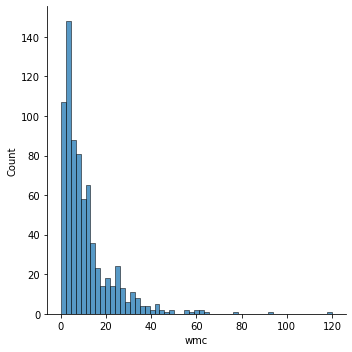

In [42]:
sn.displot(data['wmc'])

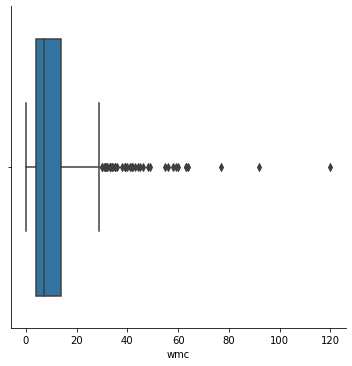

In [43]:
sn.catplot(x='wmc', kind='box', data=data)

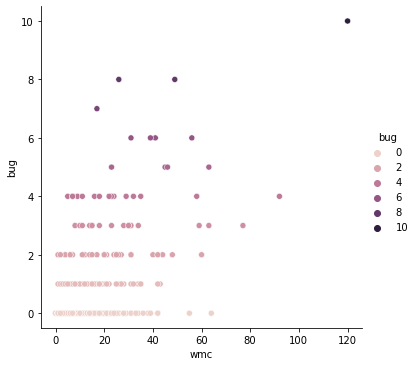

In [44]:
sn.relplot(x='wmc', y='bug', hue='bug',data=data)

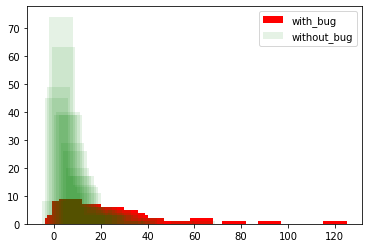

In [45]:
with_bug = []
without_bug = []
col_feature = np.array(data['wmc'])
col_bug = np.array(data['bug'])

for i in range(len(col_bug)):    
    if col_bug[i] > 0:        
        with_bug.append(col_feature[i])
    else:        
        without_bug.append(col_feature[i])

X, Y = count_values(with_bug)
X2, Y2 = count_values(without_bug)

bar_width = 10
plt.bar(X, Y, bar_width,  color="red", alpha=1, label="with_bug")
bar_width = 10
plt.bar(X2, Y2, bar_width,  color="green", alpha=0.10, label="without_bug")
plt.legend(loc='upper right')
plt.show()

In [46]:
print(np.around(np.corrcoef(data['bug'], data['wmc'])[0,1],3))
covariance = cov(data['bug'], data['wmc'])
print(covariance)
print(np.around(pearsonr(data['bug'], data['wmc']),4))

0.562
[[  1.29657574   7.66391715]
 [  7.66391715 143.42369561]]
[0.562 0.   ]


## 4.4 CE

Efferent coupling is a coupling metric in software development. It measures the number of data types a class knows about. This includes inheritance, interface implementation, parameter types, variable types, and exceptions. 

Type: ordinal

In [47]:
data['ce'].describe()

count    745.000000
mean       5.746309
std        5.653176
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       37.000000
Name: ce, dtype: float64

<AxesSubplot:xlabel='ce', ylabel='Count'>

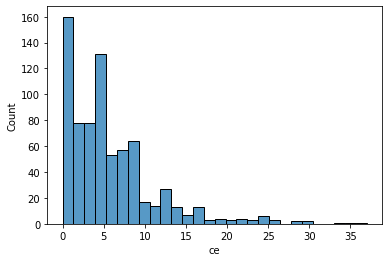

In [48]:
sn.histplot(data['ce'])

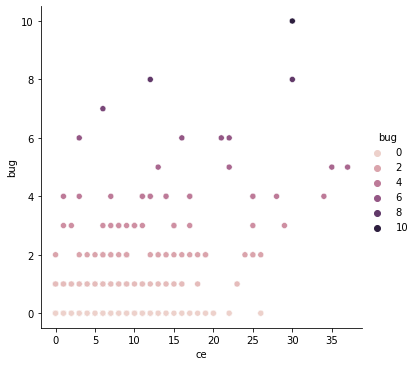

In [49]:
sn.relplot(x='ce', y='bug', hue='bug',data=data)

In [50]:
print(np.around(np.corrcoef(data['bug'], data['wmc'])[0,1],3))
covariance = cov(data['bug'], data['wmc'])
print(covariance)
print(np.around(pearsonr(data['bug'], data['wmc']),4))

0.562
[[  1.29657574   7.66391715]
 [  7.66391715 143.42369561]]
[0.562 0.   ]


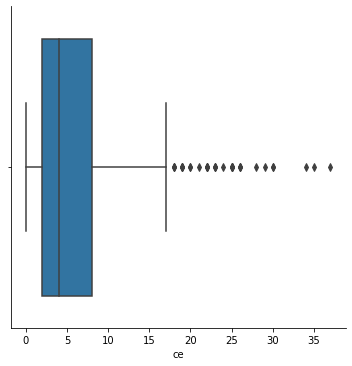

In [51]:
sn.catplot(x='ce', kind='box', data=data)

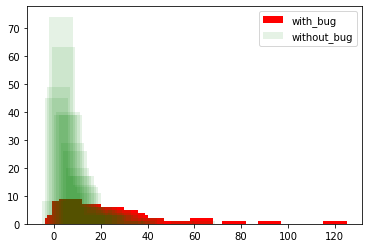

In [52]:
with_bug = []
without_bug = []
col_feature = np.array(data['wmc'])
col_bug = np.array(data['bug'])

for i in range(len(col_bug)):    
    if col_bug[i] > 0:        
        with_bug.append(col_feature[i])
    else:        
        without_bug.append(col_feature[i])

X, Y = count_values(with_bug)
X2, Y2 = count_values(without_bug)

bar_width = 10
plt.bar(X, Y, bar_width,  color="red", alpha=1, label="with_bug")
bar_width = 10
plt.bar(X2, Y2, bar_width,  color="green", alpha=0.10, label="without_bug")
plt.legend(loc='upper right')
plt.show()

## 4.5 BUG

A software bug is an error, flaw or fault in a computer program or system that causes it to produce an incorrect or unexpected result, or to behave in unintended ways

In [53]:
data['bug'].describe()

count    745.000000
mean       0.453691
std        1.138673
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       10.000000
Name: bug, dtype: float64

<AxesSubplot:xlabel='bug', ylabel='Count'>

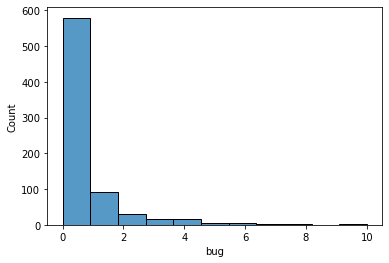

In [54]:
sn.histplot(data['bug'])

# 4.6 pairplot

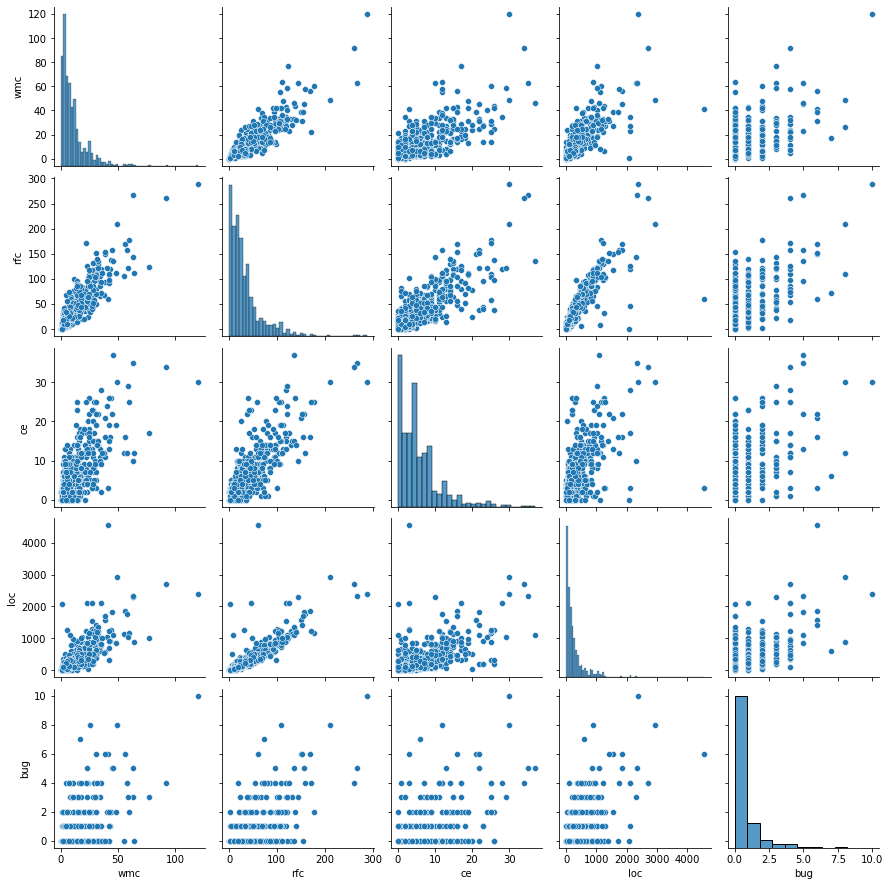

In [55]:
sn.pairplot(data)

more plot 
- sn.relplot(x='rfc', y='loc', hue='bug',data=data)
- sn.relplot(x='rfc', y='wmc', hue='bug',data=data)
- sn.relplot(x='rfc', y='ce', hue='bug',data=data) 
- sn.relplot(x='bug', y='rfc', hue='bug',data=data)

### 4.7 Only bugs

In [56]:
only_bug = data.query('bug > 0')
only_bug.shape

(166, 5)

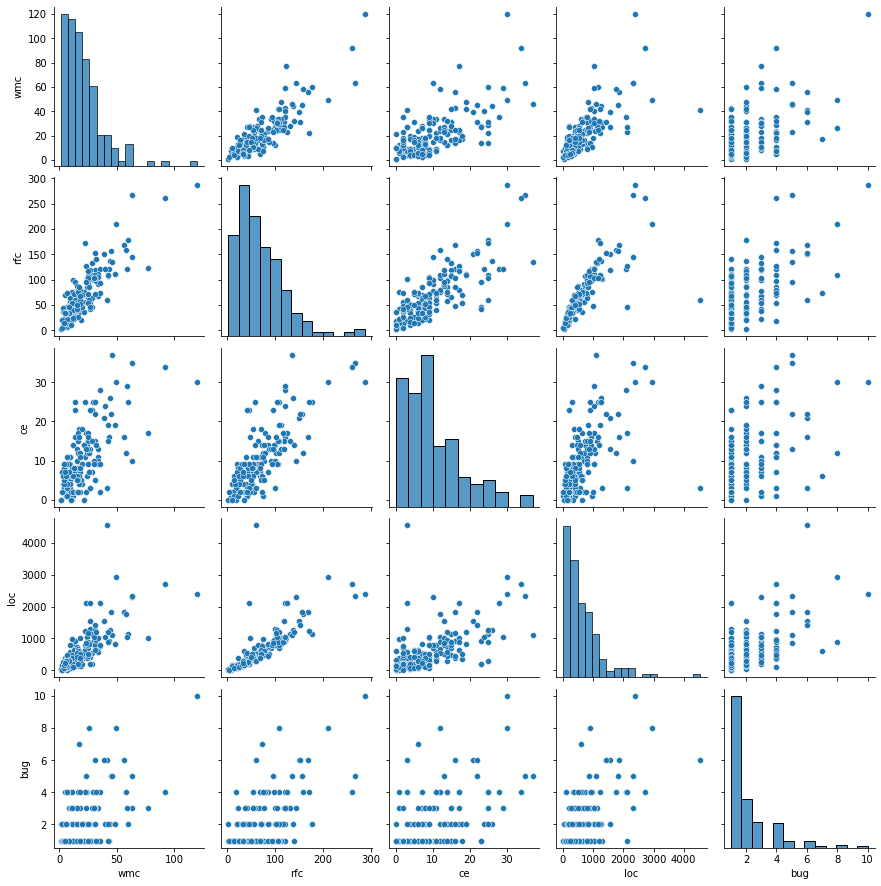

In [57]:
sn.pairplot(only_bug)

# 5 - Computation of descriptive statistics for the dependent and the independent variables

## Decision Tree Classifier Building
- https://mljar.com/blog/visualize-decision-tree/
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python

### 1 features

In [58]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Accuracy: 0.8125


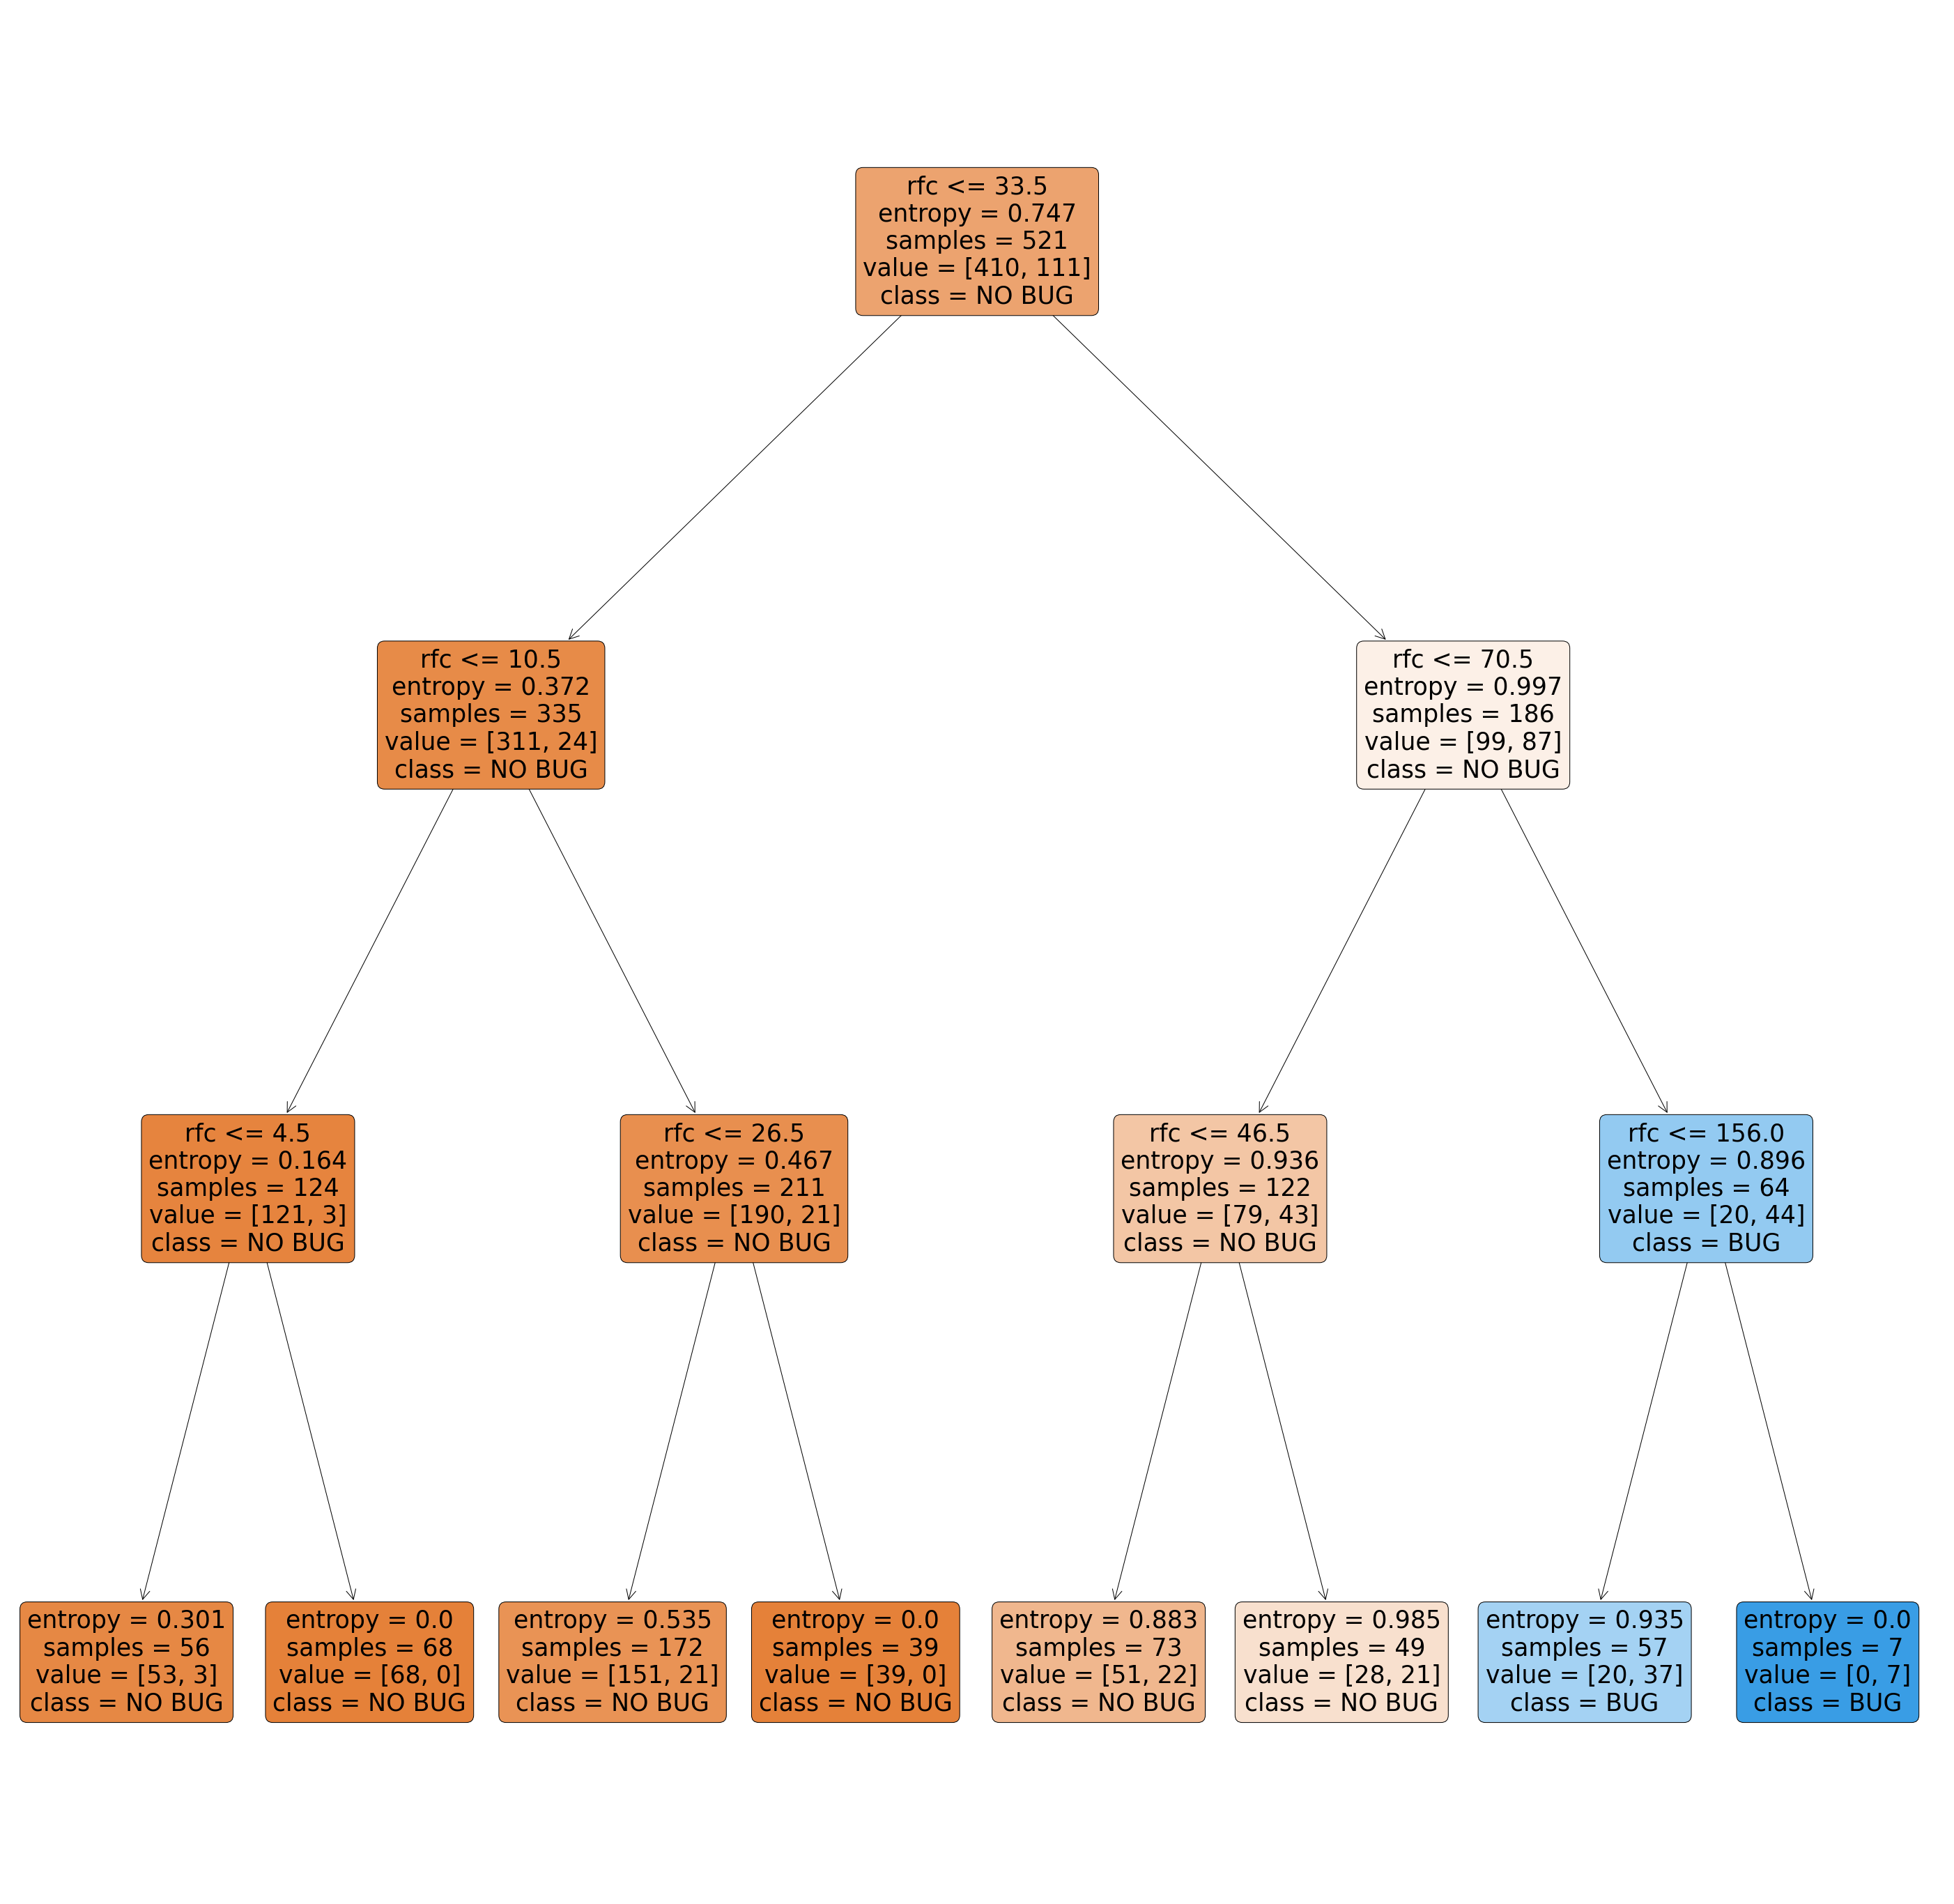

In [59]:
data_tree = pd.read_csv(path)
feature_cols = ['rfc']
X = data_tree[feature_cols] # Features
y = data_tree.bug # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# 2 class - just bug and not bug
y_train[y_train > 0 ] = 1
y_test[y_test > 0 ] = 1

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf,feature_names=feature_cols, class_names=["NO BUG","BUG"],filled=True,rounded=True,)

## 2 features

Accuracy: 0.8214285714285714


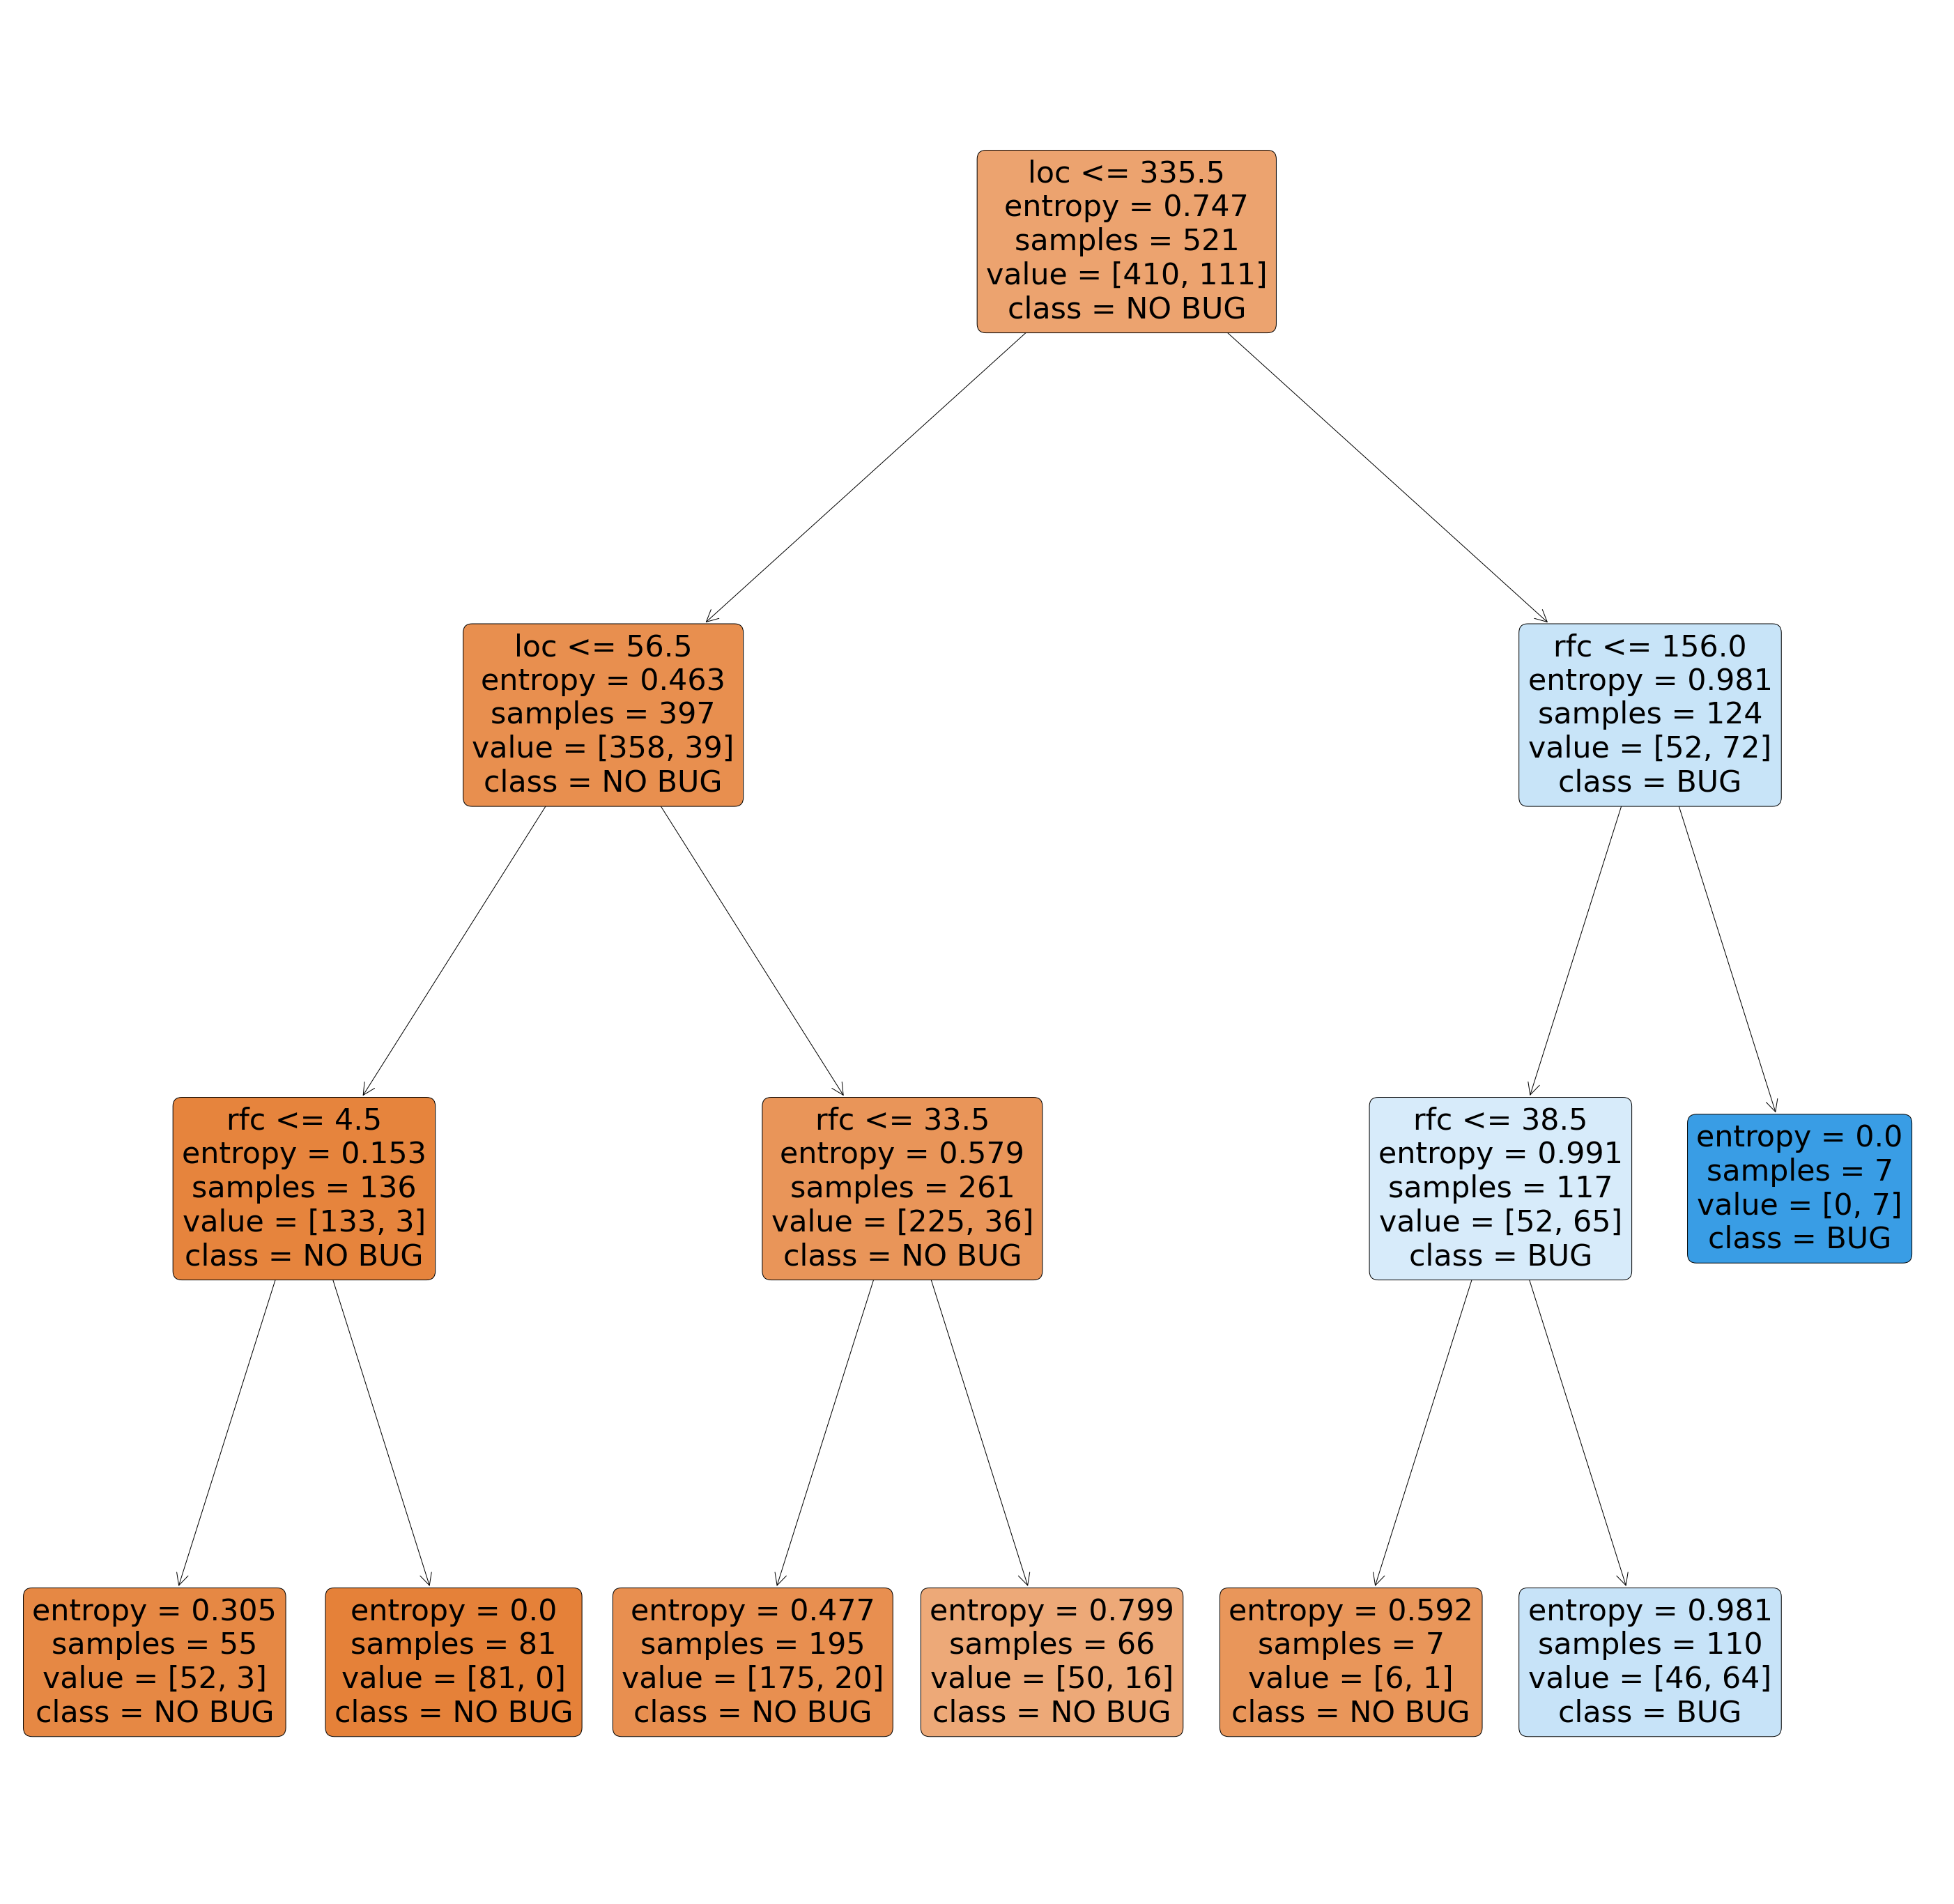

In [60]:
feature_cols = ['rfc','loc']
data_tree = pd.read_csv(path)
X = data_tree[feature_cols] # Features
y = data_tree.bug # Target variable
# y[y > 0 ] = 1

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# 2 class - just bug and not bug
y_train[y_train > 0 ] = 1
y_test[y_test > 0 ] = 1

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf,feature_names=feature_cols, class_names=["NO BUG","BUG"],filled=True,rounded=True,)


## 3 features

Accuracy: 0.8214285714285714


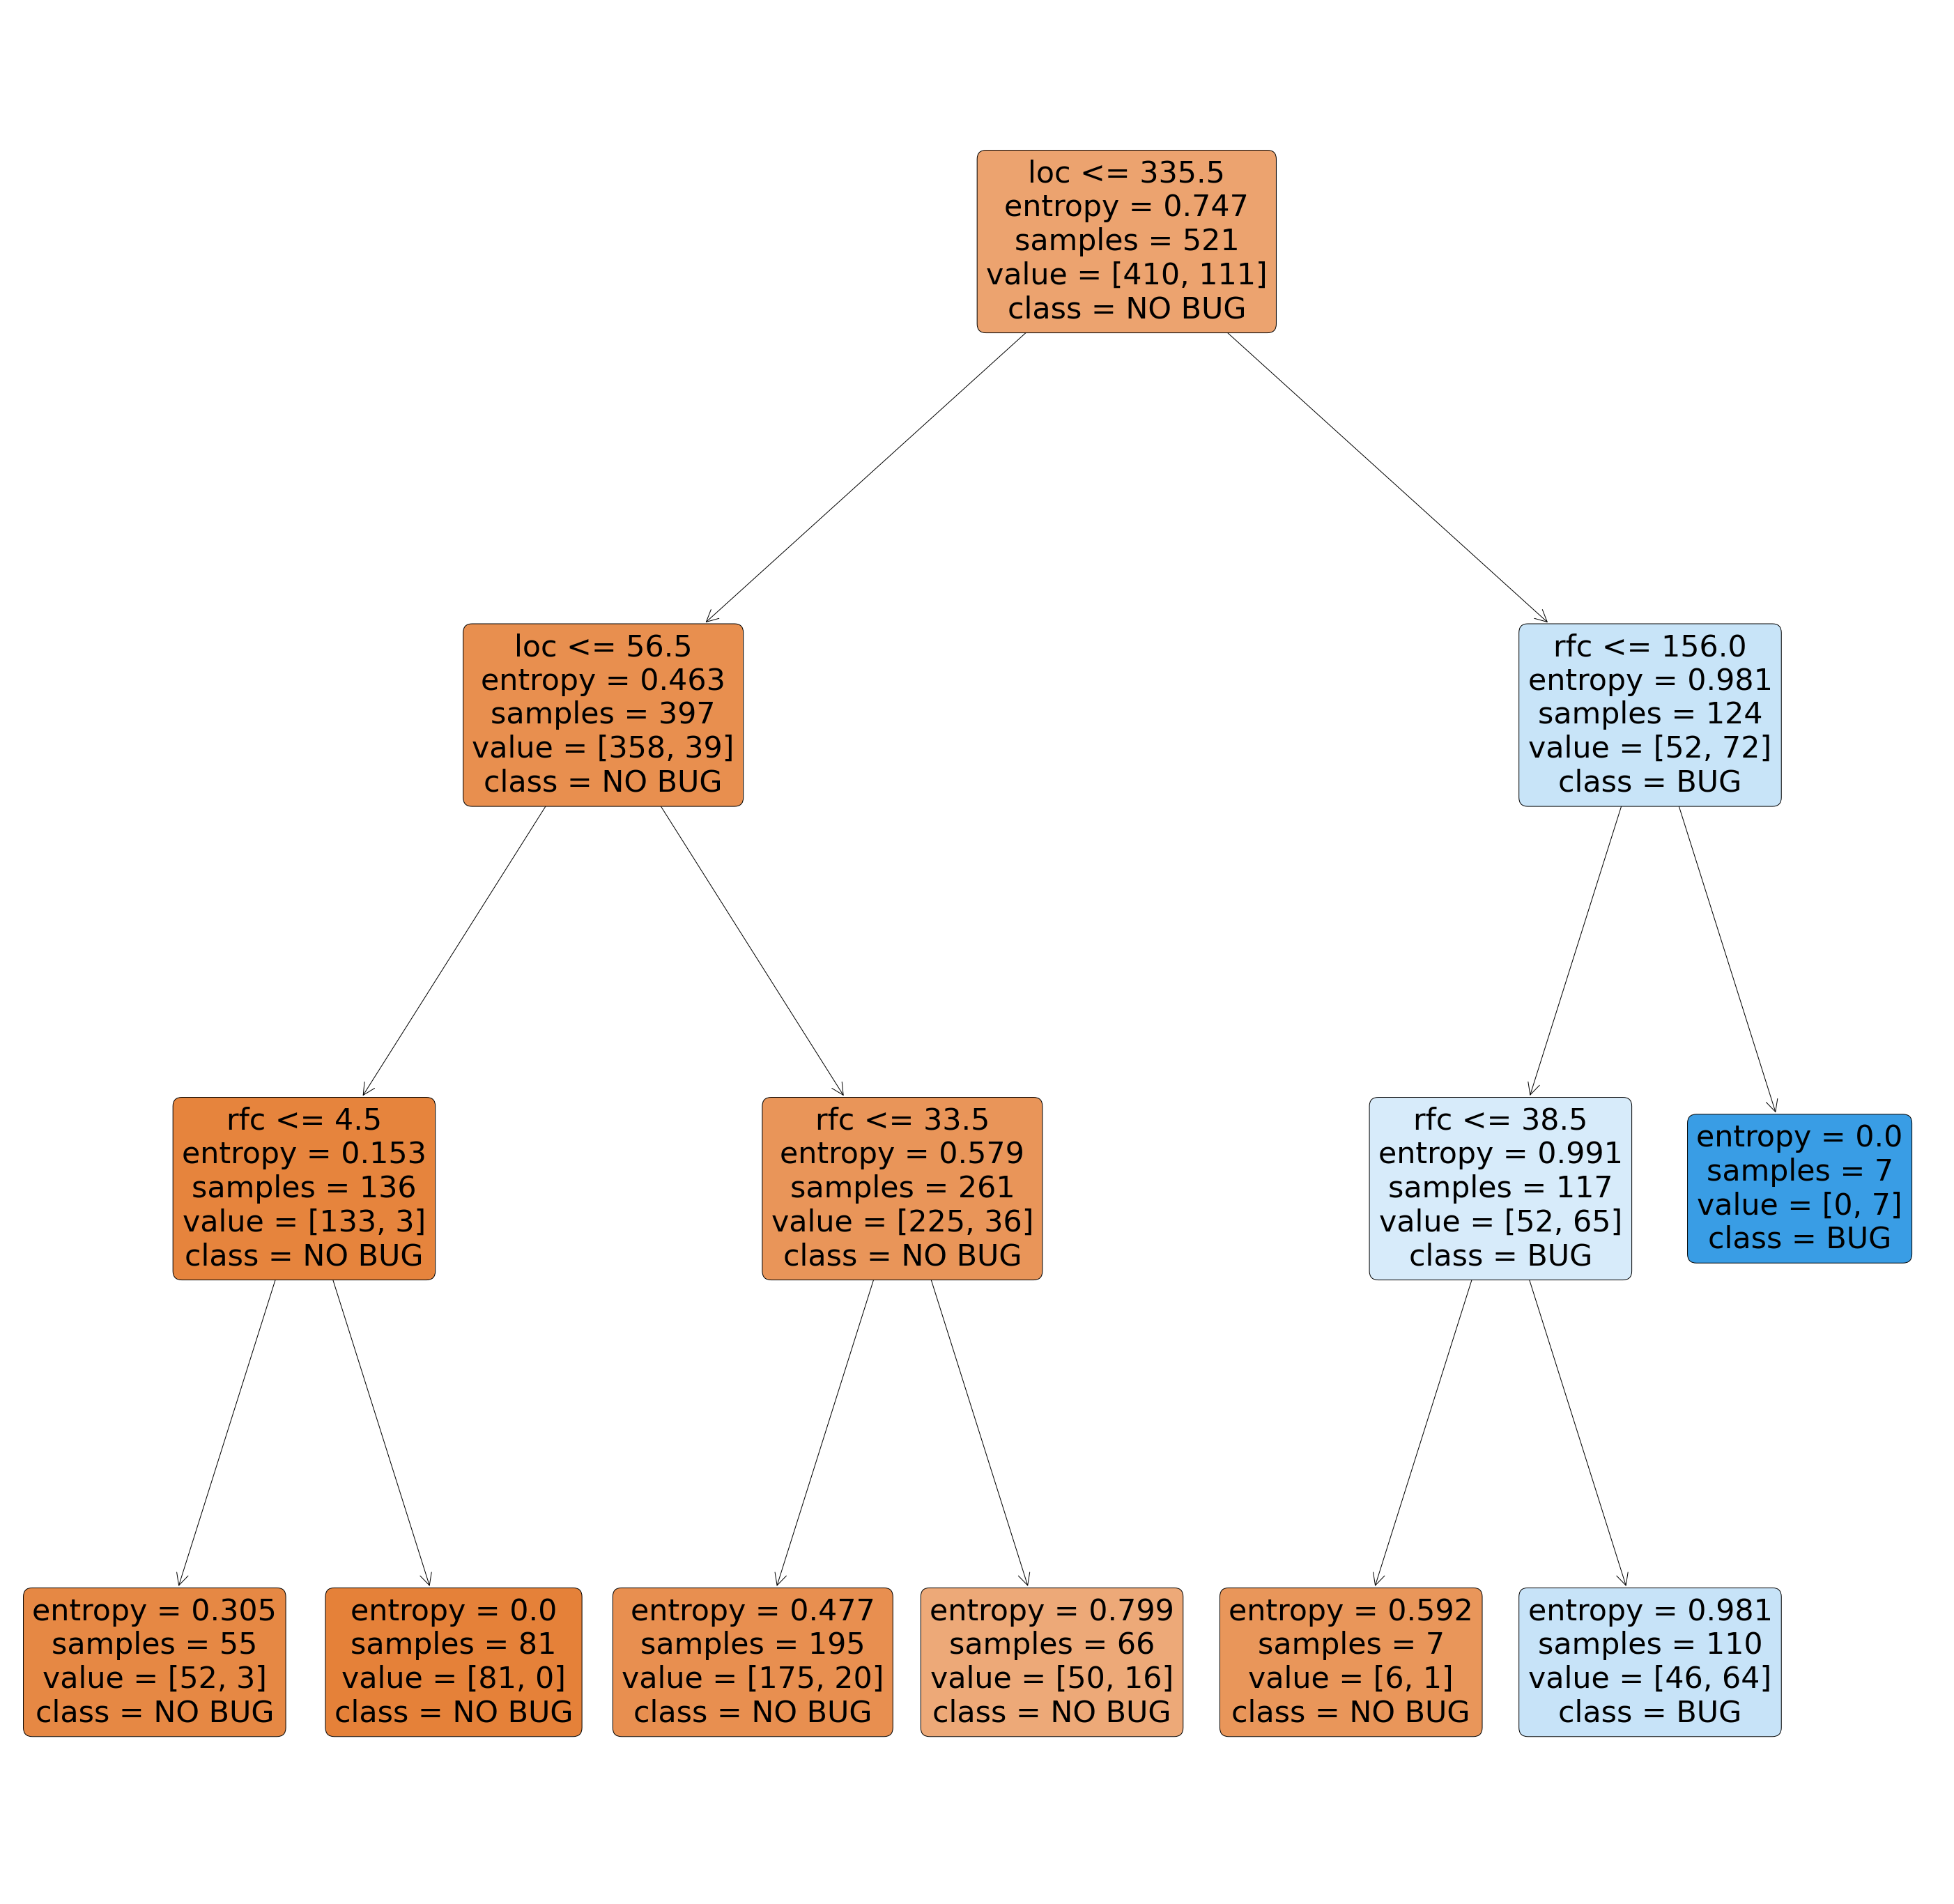

In [61]:
feature_cols = ['rfc','loc','wmc']
data_tree = pd.read_csv(path)
X = data_tree[feature_cols] # Features
y = data_tree.bug # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# 2 class - just bug and not bug
y_train[y_train > 0 ] = 1
y_test[y_test > 0 ] = 1

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf,feature_names=feature_cols, class_names=["NO BUG","BUG"],filled=True,rounded=True,)

## 4 features

Accuracy: 0.8125


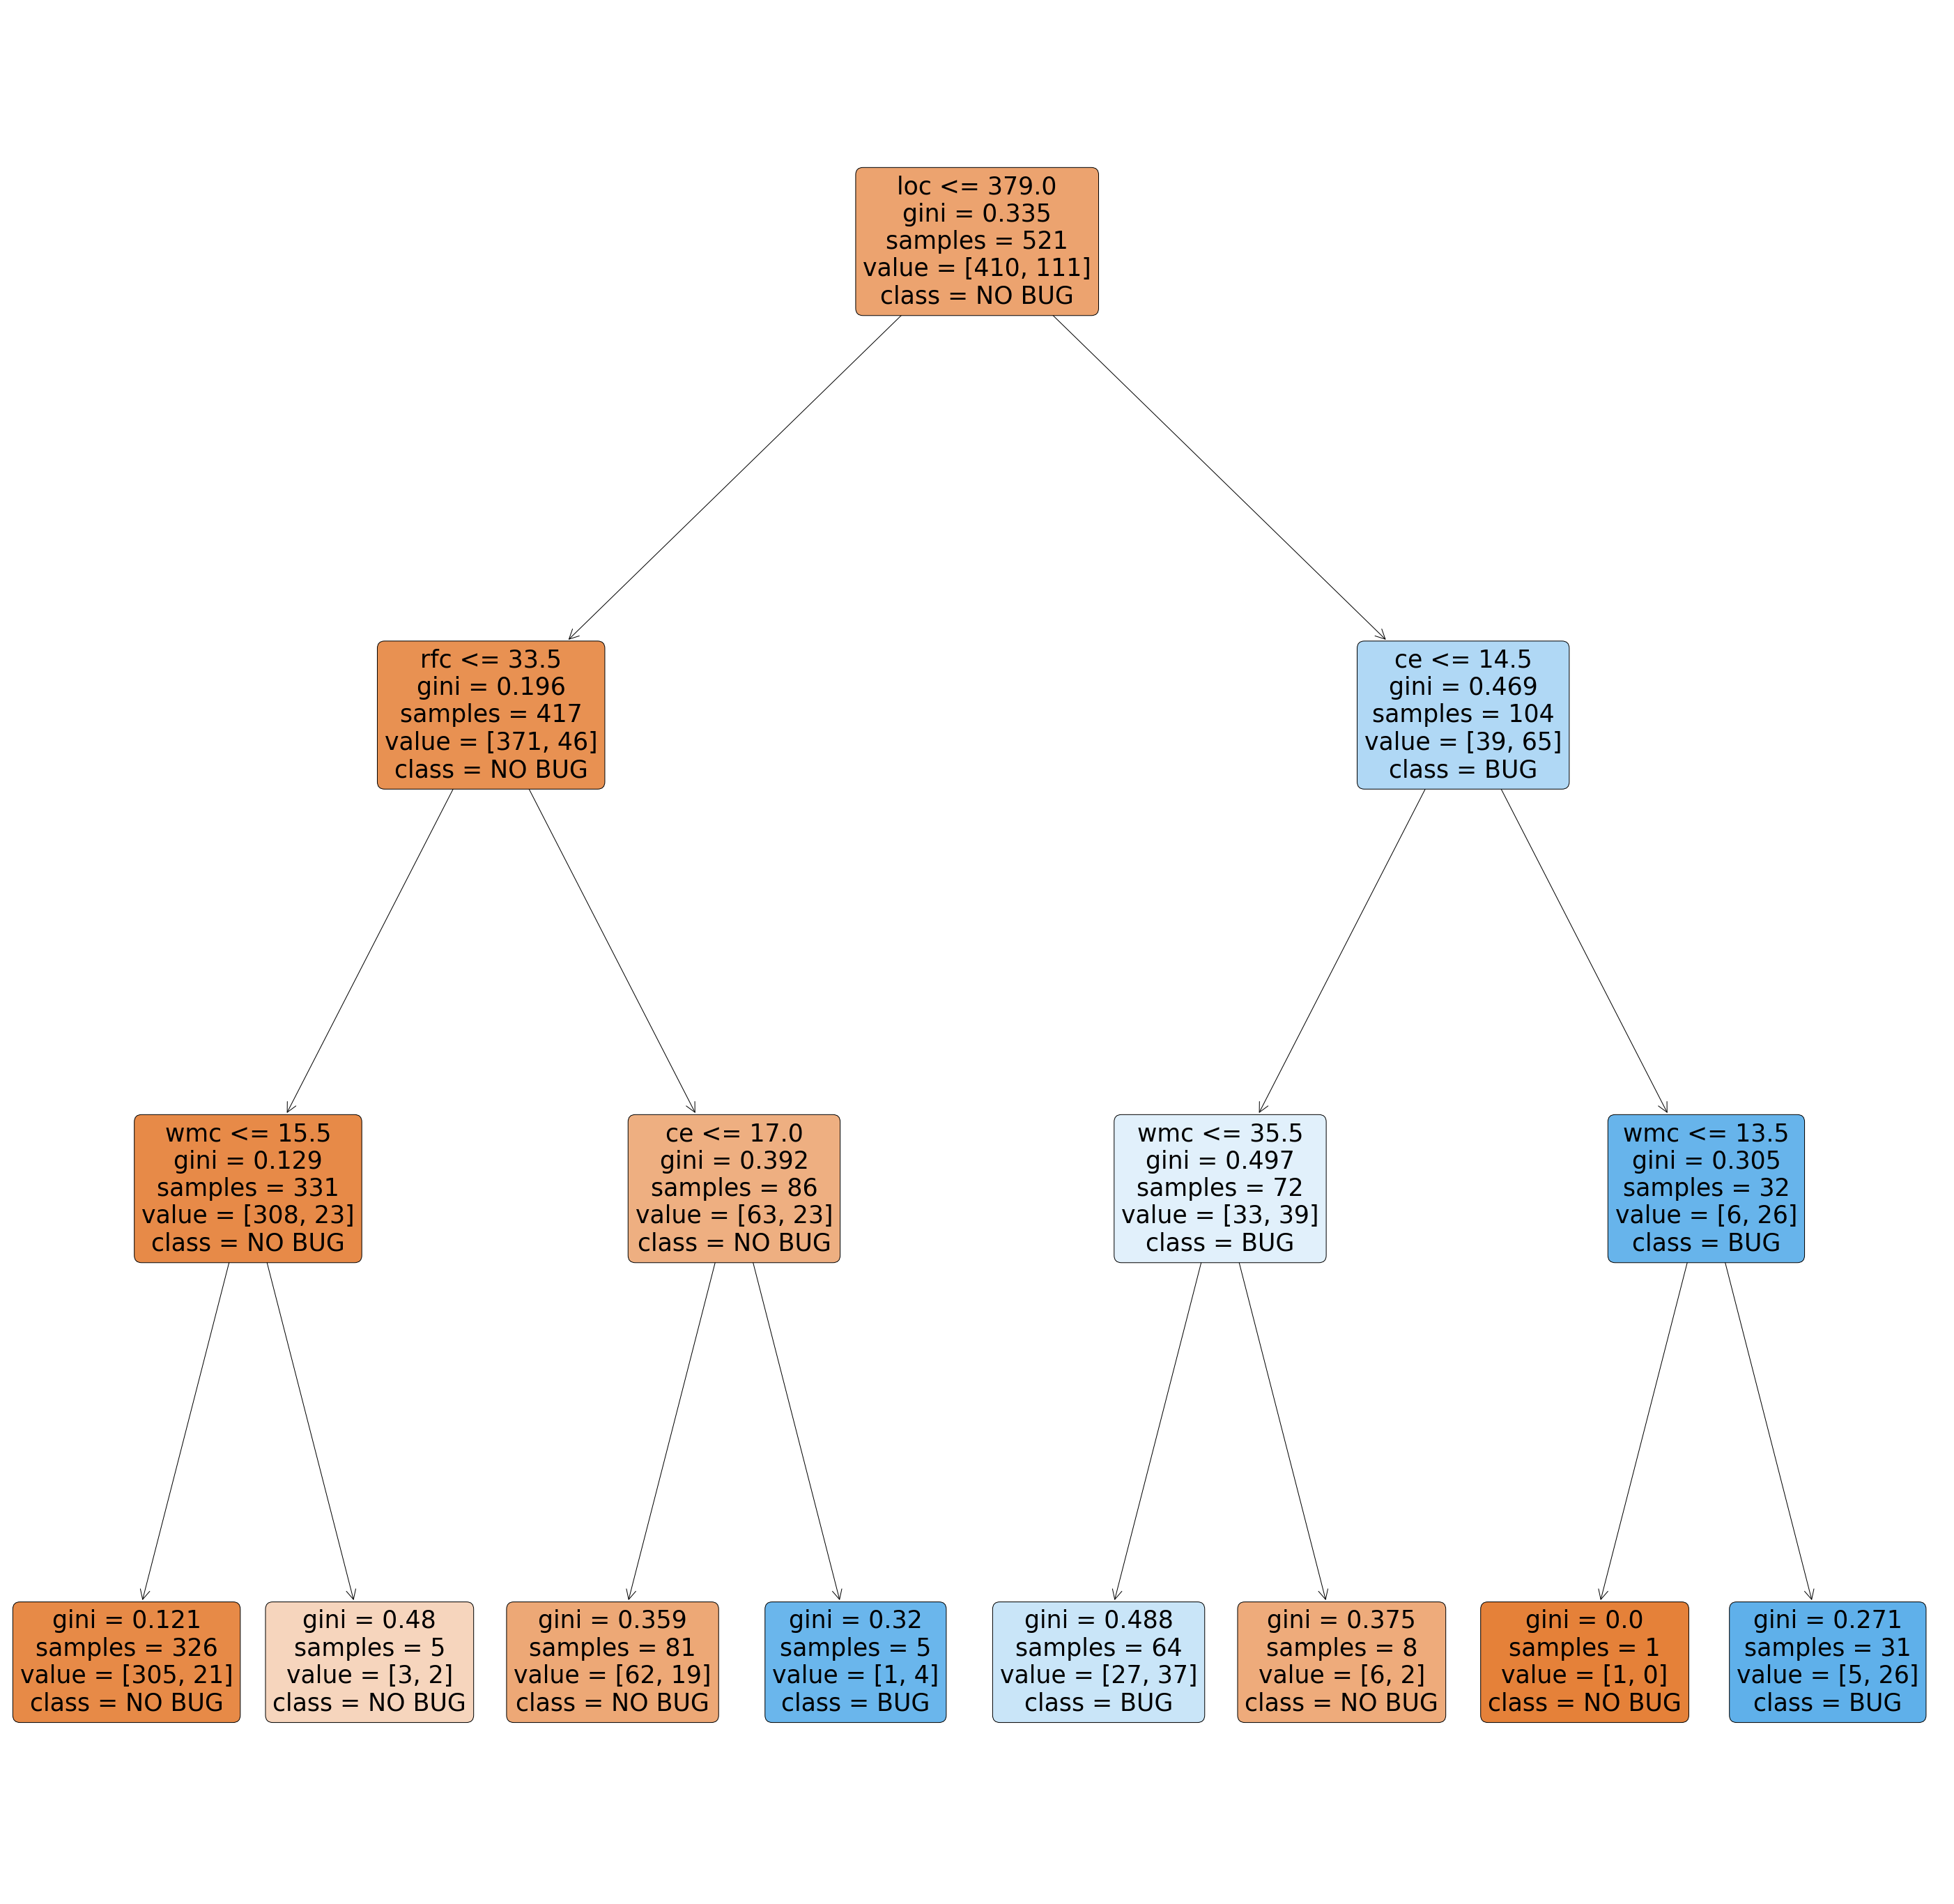

In [62]:
feature_cols = ['rfc','loc','wmc','ce']
data_tree = pd.read_csv(path)
X = data_tree[feature_cols] # Features
y = data_tree.bug           # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# 2 class - just bug and not bug
y_train[y_train > 0 ] = 1
y_test[y_test > 0 ] = 1

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf,feature_names=feature_cols, class_names=["NO BUG","BUG"],filled=True,rounded=True,)

### 4 features + 3 classified

Accuracy: 0.7589285714285714


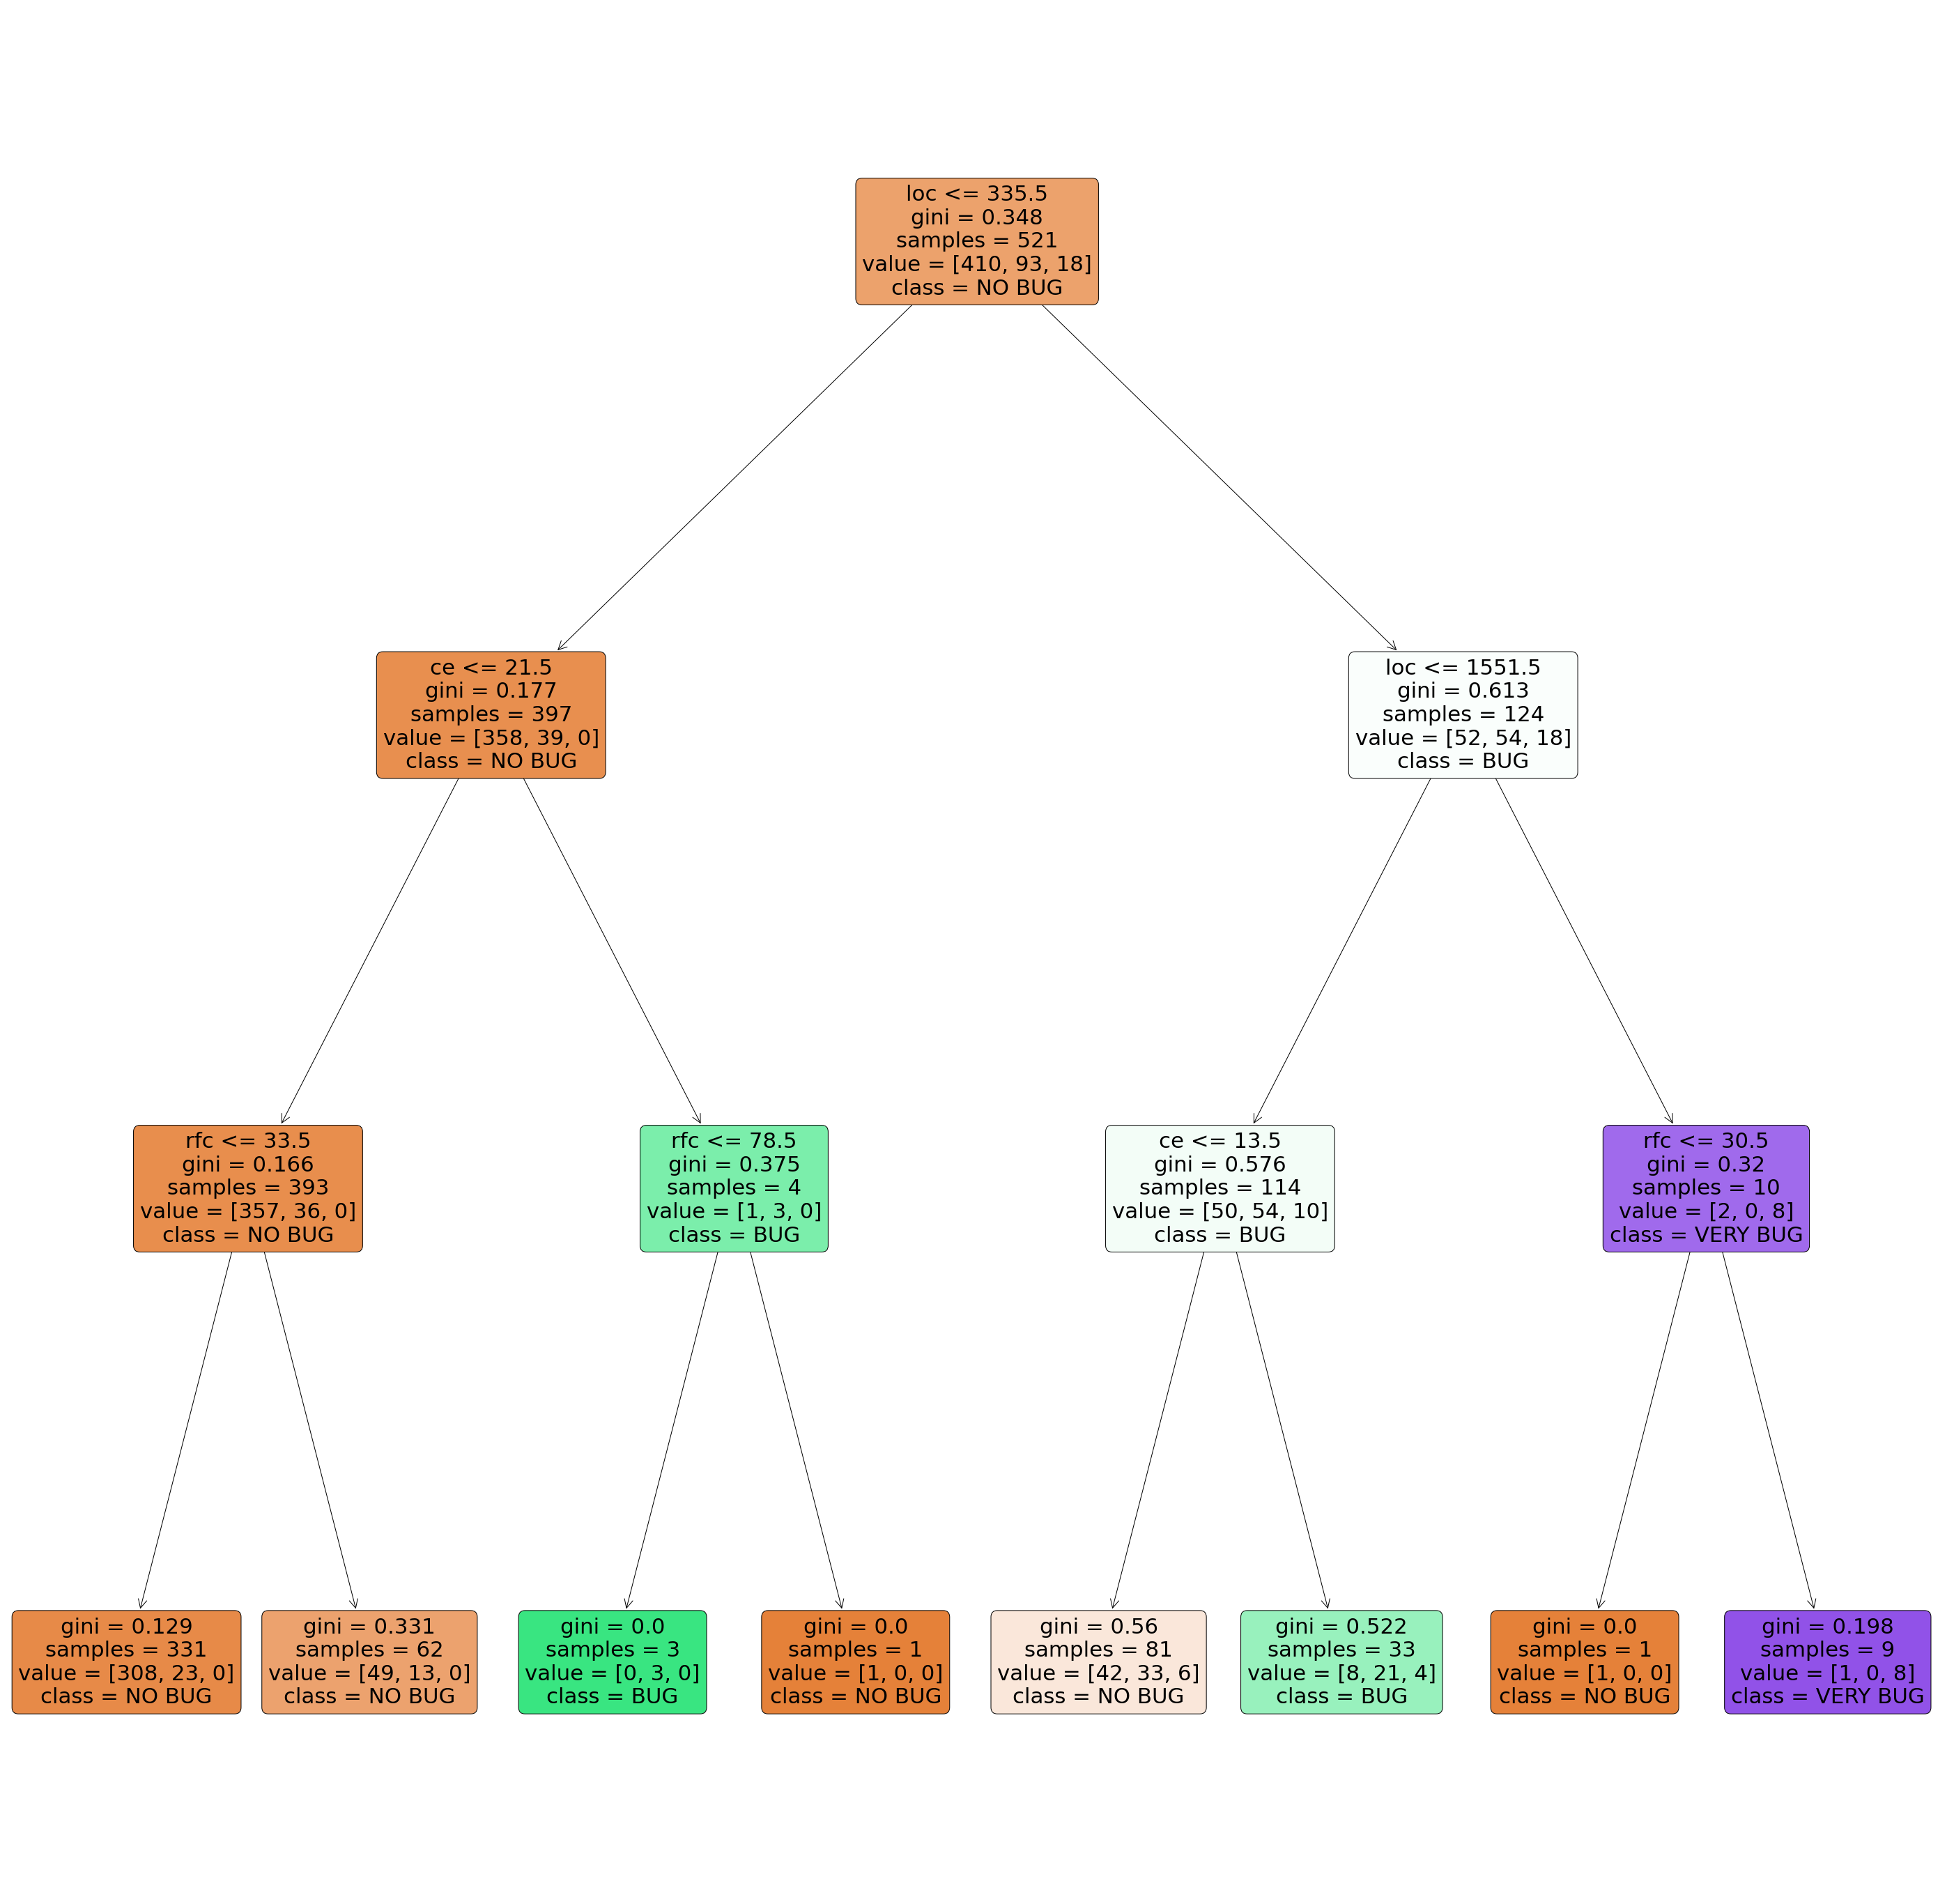

In [63]:
feature_cols = ['rfc','loc','wmc','ce']
data_tree = pd.read_csv(path)
X = data_tree[feature_cols] # Features
y = data_tree.bug           # Target variable
# y[(y > 0)&(y <=3)] = 1
# y[y > 3 ] = 2

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# 3 class - bug and not bug and VERY BUG
y_train[(y_train > 0) & (y_train <= 3) ] = 1
y_train[(y_train > 3)] = 2

y_test[(y_test > 0) & (y_test <= 3) ] = 1
y_test[(y_test > 3)] = 2

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf,feature_names=feature_cols, class_names=["NO BUG","BUG","VERY BUG"],filled=True,rounded=True,)

### Naive Bayes
- https://www.edureka.co/blog/naive-bayes-tutorial/
- https://www.aionlinecourse.com/tutorial/machine-learning/bayes-theorem

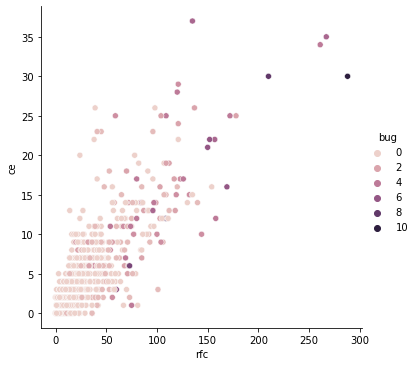

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler 

# ['rfc','loc','wmc','ce']

data_naive_bayes = pd.read_csv(path)
features_list = ['rfc','ce','bug']
drop_list = []

for current_features in data_naive_bayes.columns:
    if not current_features in features_list:
        drop_list.append(current_features)

data_naive_bayes = data_naive_bayes.drop(drop_list, axis=1)        
data_naive_bayes.shape

sn.relplot(x=features_list[0], y=features_list[1], hue='bug',data=data_naive_bayes)

[-1.94110437 -1.93110437 -1.92110437 ...  7.94889563  7.95889563
  7.96889563]


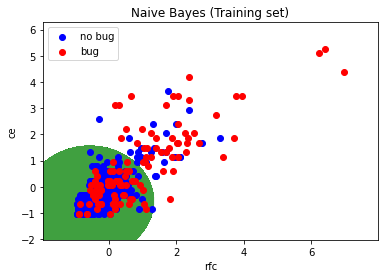

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       169
           1       0.61      0.36      0.45        55

    accuracy                           0.79       224
   macro avg       0.71      0.64      0.66       224
weighted avg       0.77      0.79      0.77       224



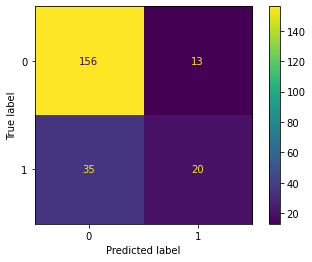

In [65]:
# Making the Feature matris and dependent vector 
X = data_naive_bayes.iloc[:, [0, 1]].values 
y = data_naive_bayes.iloc[:, 2].values
y[y > 0 ] = 1

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

model = GaussianNB()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

# Visualising the Training set results 
from matplotlib.colors import ListedColormap 
X_set, y_set = X_train, y_train 

# numpy.meshgrid -> Return coordinate matrices from coordinate vectors.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# contour and contourf draw contour lines and filled contours, respectively. 
# Except as noted, function signatures and return values are the same for both versions.
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('green', 'white'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

colors = ['blue', 'red']
labels = ['no bug', 'bug']

print(X1.ravel())

for i, j in enumerate(np.unique(y_set)):     
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colors[i], label = labels[j]) 

plt.title('Naive Bayes (Training set)') 
plt.xlabel(features_list[0]) 
plt.ylabel(features_list[1]) 
plt.legend() 
plt.show()

print(metrics.classification_report(expected, predicted))
disp = plot_confusion_matrix(model, X_test, y_test)